<a href="https://colab.research.google.com/github/2303A51786/2303A51786/blob/main/LAB04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature set size: (17000, 6)
Variable set size: (17000,)
Training feature set size: (13600, 6)
Test feature set size: (3400, 6)
Training variable set size: (13600,)
Test variable set size: (3400,)
The intercept term of the linear model: -47047.711648641736
The coefficients of the linear model: [ 1.90283604e+03 -1.93077011e+01  9.32748894e+01 -4.03035245e+01
  1.43008029e+02  4.80070931e+04]


,Coefficients
housing_median_age,1902.836039
total_rooms,-19.307701
total_bedrooms,93.274889
population,-40.303524
households,143.008029
median_income,48007.093077


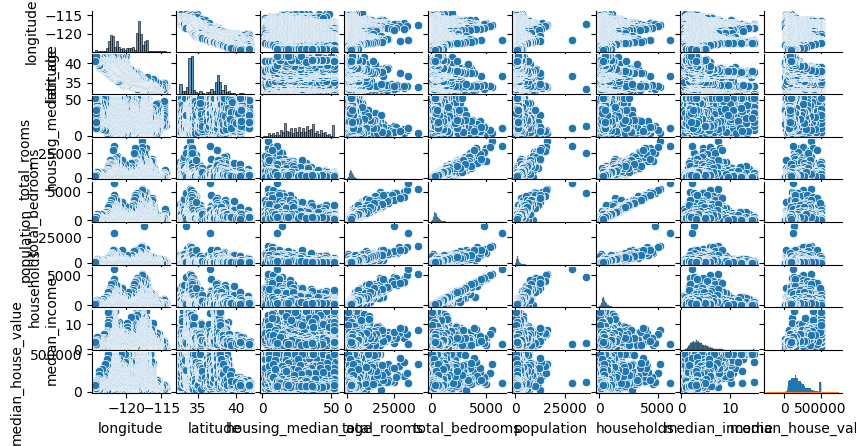

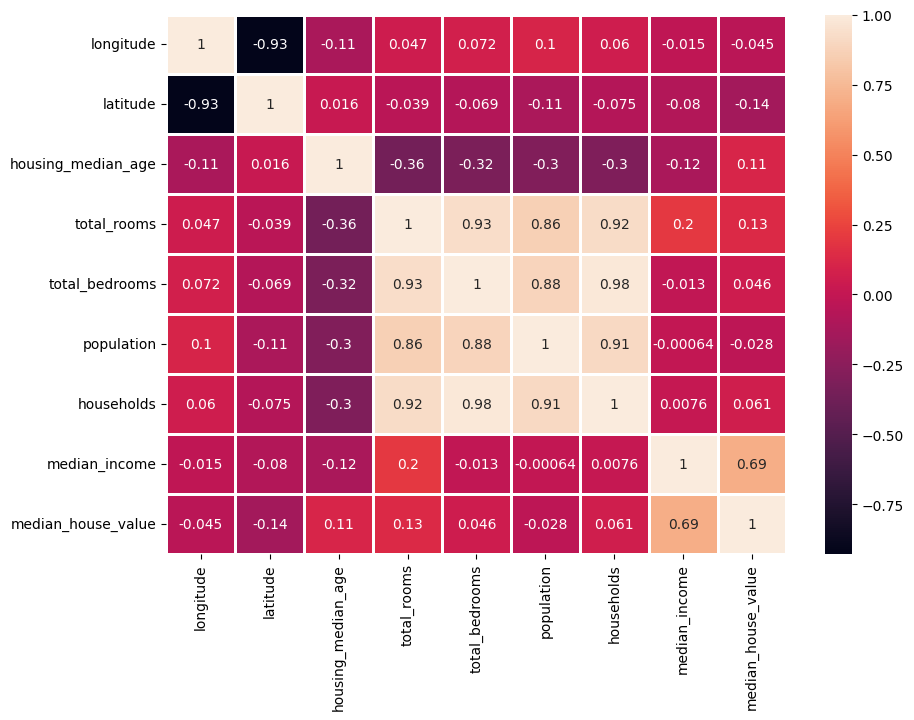

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv("/content/sample_data/california_housing_train.csv")
df.head()
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])
df.columns
sns.pairplot(df)
df['median_house_value'].plot.hist(bins=25,figsize=(8,4))
df['median_house_value'].plot.density()
df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)
## Y = MX +C where Y is dependent, X is independent features
## M is slope, C is intercept
l_column = list(df.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column, len_feature
X = df[l_column[2:len_feature-1]]
y = df[l_column[len_feature-1]]
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)
X.head()
y.head()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=123)
y_train.shape, y_test.shape, X_train.shape, X_test.shape
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable
print("The intercept term of the linear model:", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf





In [11]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=cdf)

https://docs.google.com/spreadsheets/d/1P3V0DGthI38nj35GTEPIlA76Es8jj87gG71r2pISAC0#gid=0


Training feature set size: (13600, 6)
Test feature set size: (3400, 6)
Training variable set size: (13600,)
Test variable set size: (3400,)
The intercept term of the linear model: -47047.711648641736
The coefficients of the linear model: [ 1.90283604e+03 -1.93077011e+01  9.32748894e+01 -4.03035245e+01
  1.43008029e+02  4.80070931e+04]
Training feature set size: (13600, 6)
Test feature set size: (3400, 6)
Training variable set size: (13600,)
Test variable set size: (3400,)
The intercept term of the linear model: -47047.711648641736
The coefficients of the linear model: [ 1.90283604e+03 -1.93077011e+01  9.32748894e+01 -4.03035245e+01
  1.43008029e+02  4.80070931e+04]
R-squared value of this fit: 0.577
Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (3400,)
Mean absolute error (MAE): 56561.26241708552
Mean square error (MSE): 6223628238.22346
Root mean square error (RMSE): 78889.97552429244
R-squared value of predictions: 0.549
-114.80050056672393 63.50

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.70465605, 0.80465605, 0.90465605, 1.00465605, 1.10465605,
        1.20465605, 1.30465605, 1.40465605, 1.50465605, 1.60465605,
        1.70465605]),
 <BarContainer object of 10 artists>)

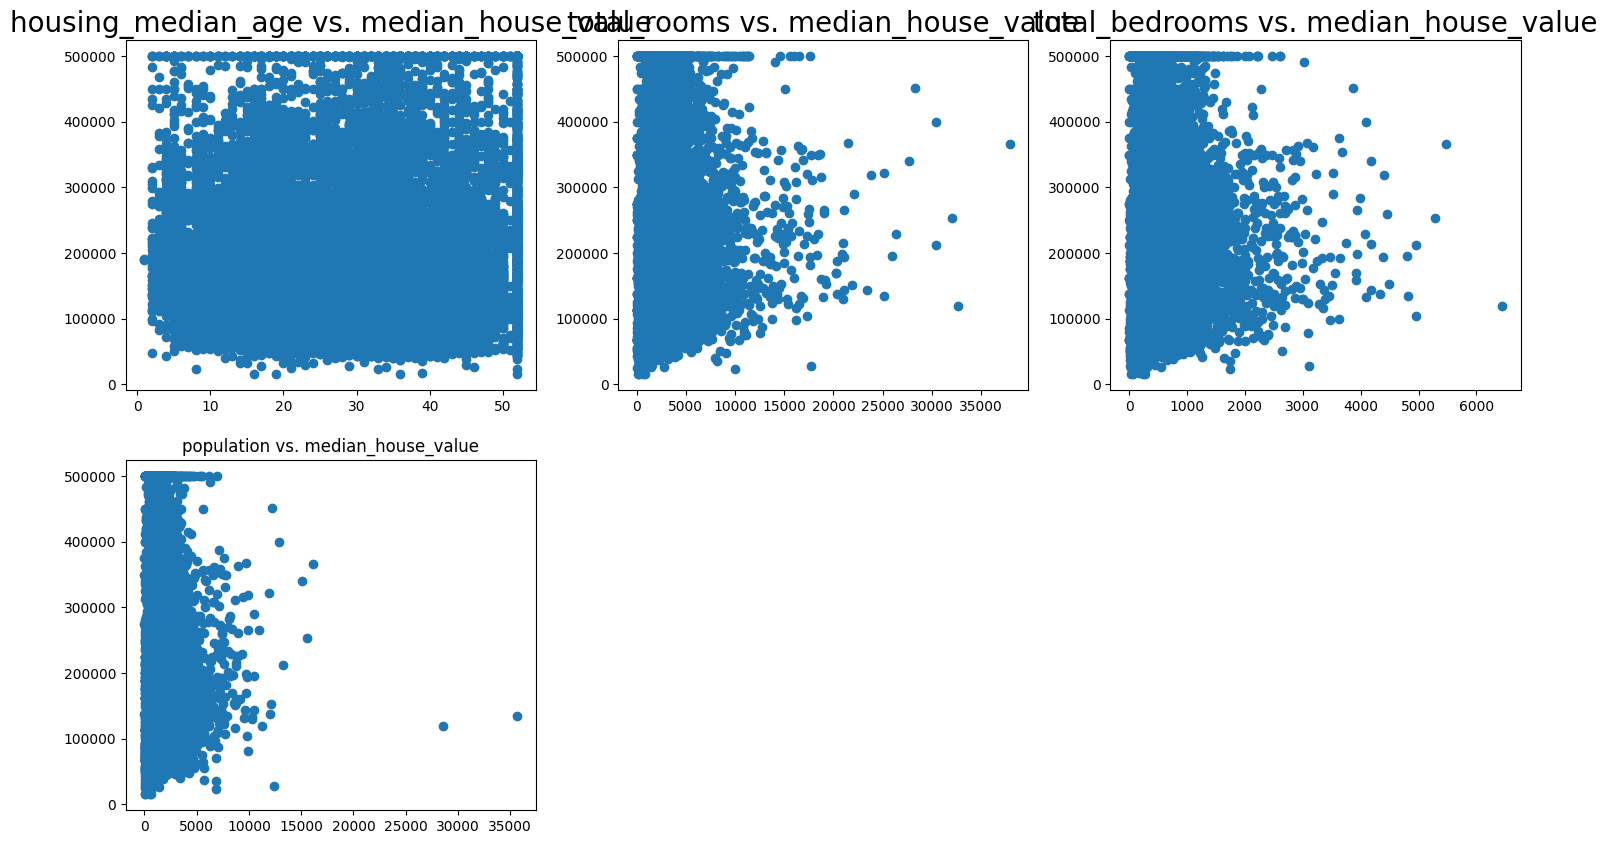

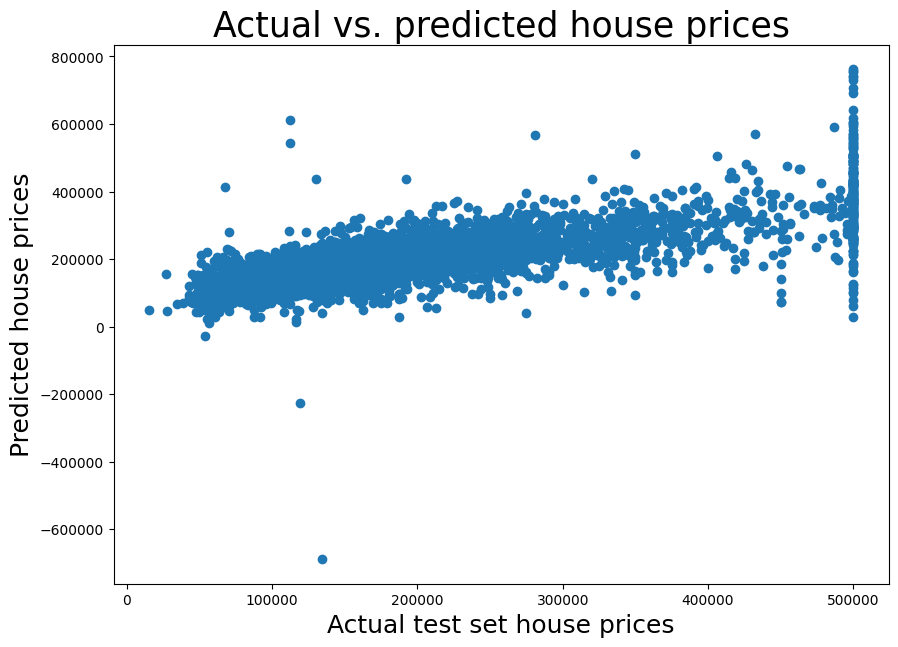

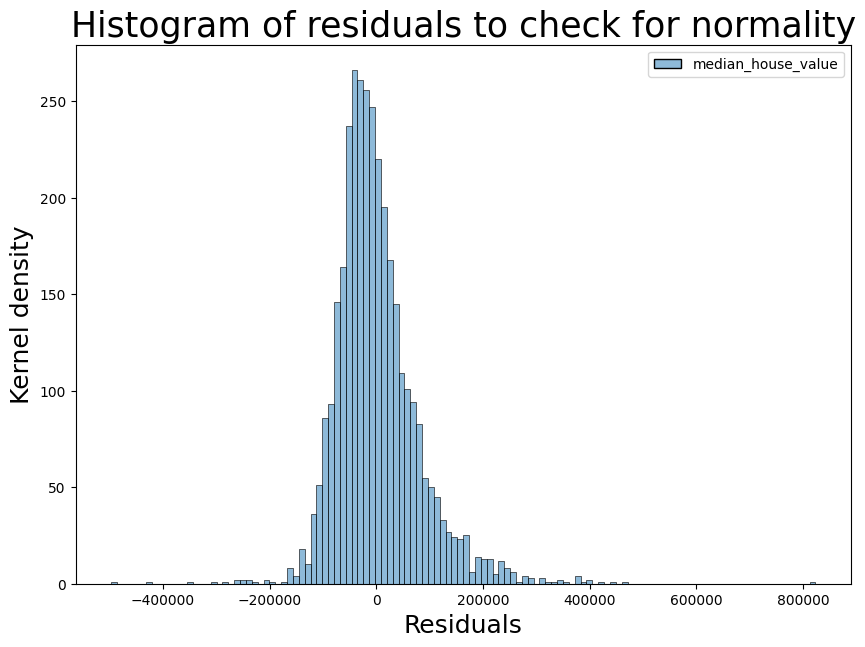

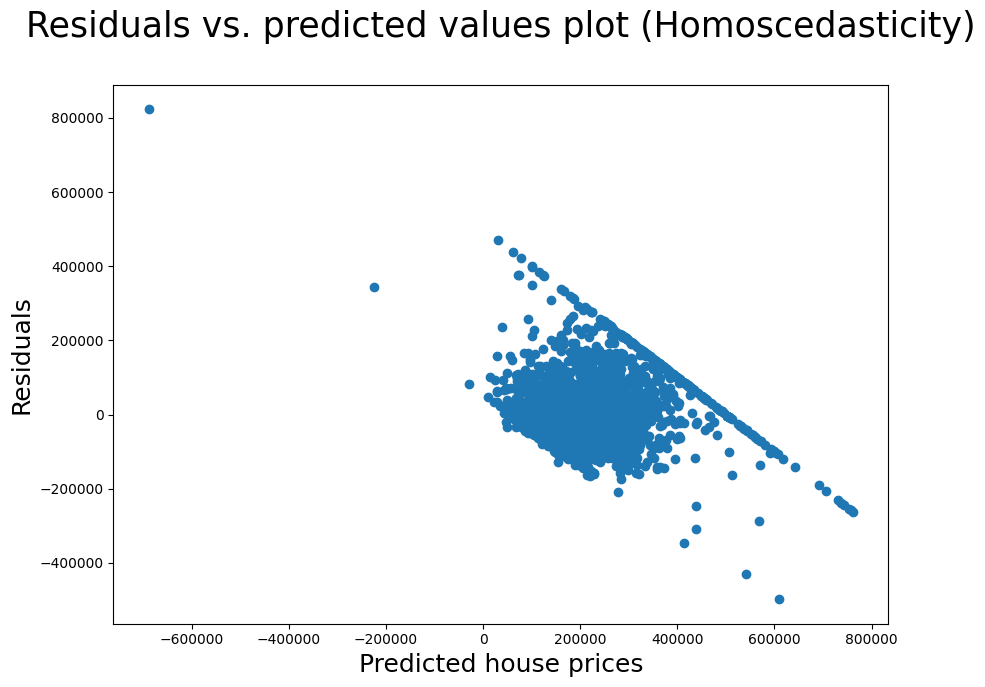

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=123)
y_train.shape, y_test.shape, X_train.shape, X_test.shape
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable
print("The intercept term of the linear model:", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[
        list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)

#cdf['Standard Error']=se
#cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
#cdf
l=list(cdf.index)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=123)
y_train.shape, y_test.shape, X_train.shape, X_test.shape
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression() # Creating a Linear Regression object 'lm'
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable
print("The intercept term of the linear model:", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0,0,0,0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[
        list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)

#cdf['Standard Error']=se
#cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
#cdf
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
# The target variable is 'median_house_value', not 'Price'
ax0.scatter(df[l[0]],df['median_house_value']) # Changed df['Price'] to df['median_house_value']
ax0.set_title(l[0]+" vs. median_house_value", fontdict={'fontsize':20}) # Changed title

ax1 = plt.subplot(gs[1])
ax1.scatter(df[l[1]],df['median_house_value']) # Changed df['Price'] to df['median_house_value']
ax1.set_title(l[1]+" vs. median_house_value",fontdict={'fontsize':20}) # Changed title

ax2 = plt.subplot(gs[2])
ax2.scatter(df[l[2]],df['median_house_value']) # Changed df['Price'] to df['median_house_value']
ax2.set_title(l[2]+" vs. median_house_value",fontdict={'fontsize':20}) # Changed title

ax3 = plt.subplot(gs[3])
ax3.scatter(df[l[3]],df['median_house_value']) # Changed df['Price'] to df['median_house_value']
ax3.set_title(l[3]+" vs. median_house_value")

print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted house prices",fontsize=25)
plt.xlabel("Actual test set house prices",fontsize=18)
plt.ylabel("Predicted house prices", fontsize=18)
plt.scatter(x=y_test,y=predictions)
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.histplot([y_test-predictions])
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted house prices",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))
#compute minmax value for observed price and expected price
import numpy as np
min=np.min(predictions/6000)
max=np.max(predictions/12000)
print(min, max)
#Compute MinMax value for Price=100
L = (100 - min)/(max - min)
L
plt.hist(L)